## <h1 align="center">Introduction </h1>Mall Analytics measure the quality of relationships between the mall and the store. By tracking customers we analyize their shopping behaviour and spending index.
![mall](https://www.dw.com/image/17955220_303.jpg)

Note:- This Kernel is subject to get updated as soon as i find something which can be revelant to the context. Please Upvote if you like the Kernel

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}



['Mall_Customers.csv']


<b>Loading the datatset<b>

In [71]:
data=pd.read_csv("../input/Mall_Customers.csv")

<b>The First Gaze<b>

In [72]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Shape of the data

In [73]:
data.shape

(200, 5)

Basic Information 

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [75]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<b> Checking for the Null values </b>

In [76]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

<b>Loading dependencies for Visualization</b>

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [79]:
sns.set(style="white", palette="PuBuGn_d", color_codes=True)


<b> Gender Distribution </b>

Female : 56.00000000000001
Male : 44.0


Text(0.5, 1.0, 'Gender distirbution')

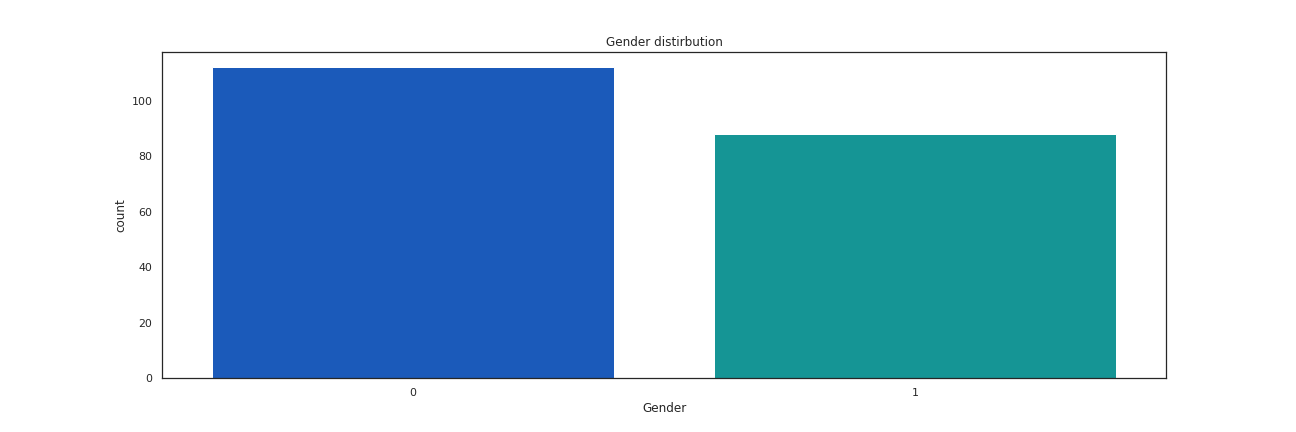

In [80]:
sns.countplot('Gender',data=data,palette='winter')
size=data['Gender'].value_counts()
print('Female :',size[0]/(size[0]+size[1])*100)
print('Male :',size[1]/(size[0]+size[1])*100)
plt.title("Gender distirbution")

A great insight, why female contribute more to the shopping 
> The real reason is sobering.  In virtually every society in the world, women have primary care-giving responsibilities for both children and the elderly (and often, just about everybody else in-between). In this primary caregiving role, women find themselves buying on behalf of everyone else in their lives. More here 
> https://www.forbes.com/sites/bridgetbrennan/2013/03/06/the-real-reason-women-shop-more-than-men/#1a0c65d174b9

<b> Age ,Annual Income and Spending Score Distribution </b>

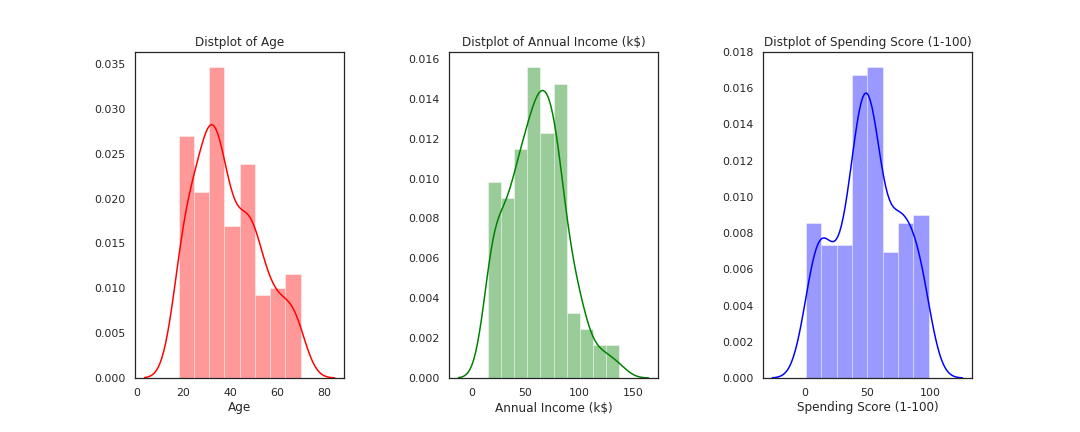

In [81]:
plt.figure(1 , figsize = (15 ,6))
n = 0 
color=['red','green','blue']
count=0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , color=color[count])
    plt.title('Distplot of {}'.format(x))
    count+=1
plt.show()

## <b>Understanding the distributionn and relation between the attributes<b>

We will be using pairs plot which allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and, fortunately and here in this example we will identify the pattern 

[]

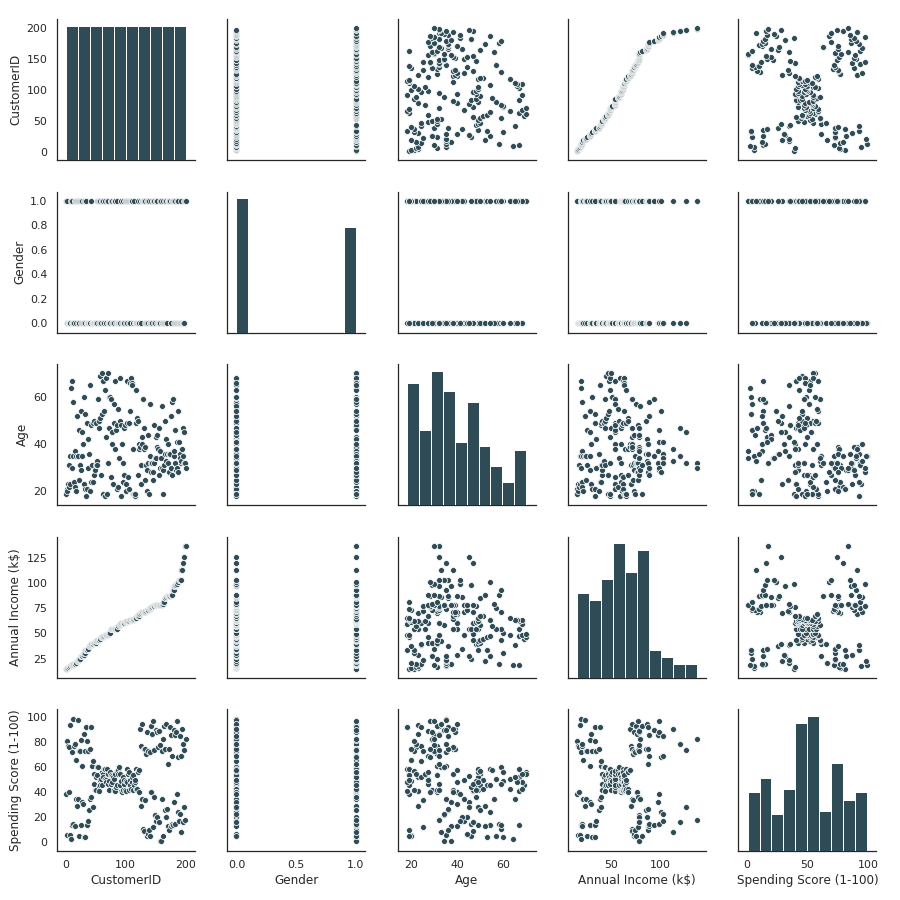

In [82]:
sns.pairplot(data)
plt.plot()

From the pair plot , we figure out that the <b>Age</b> between <b>20-40</b> having high spending index and following it, the spending score doesn't show any frequent rise in the score. 
We also conclude that <b>age between 20-40</b> have dense and higher Annual Income and the trend decreases down the age. We also see that <b>Spending score</b> is releatively less with higher Annual income (50-75)K compare to 25-50K Annual income. Spending Index (45-60) becomes constant for indiviudal with <b> Annual income between 50-75K dollar </b> and then the spending index increases for higher and lower Annual income. This is weird!


<b> Checking for the correleation<b>

[]

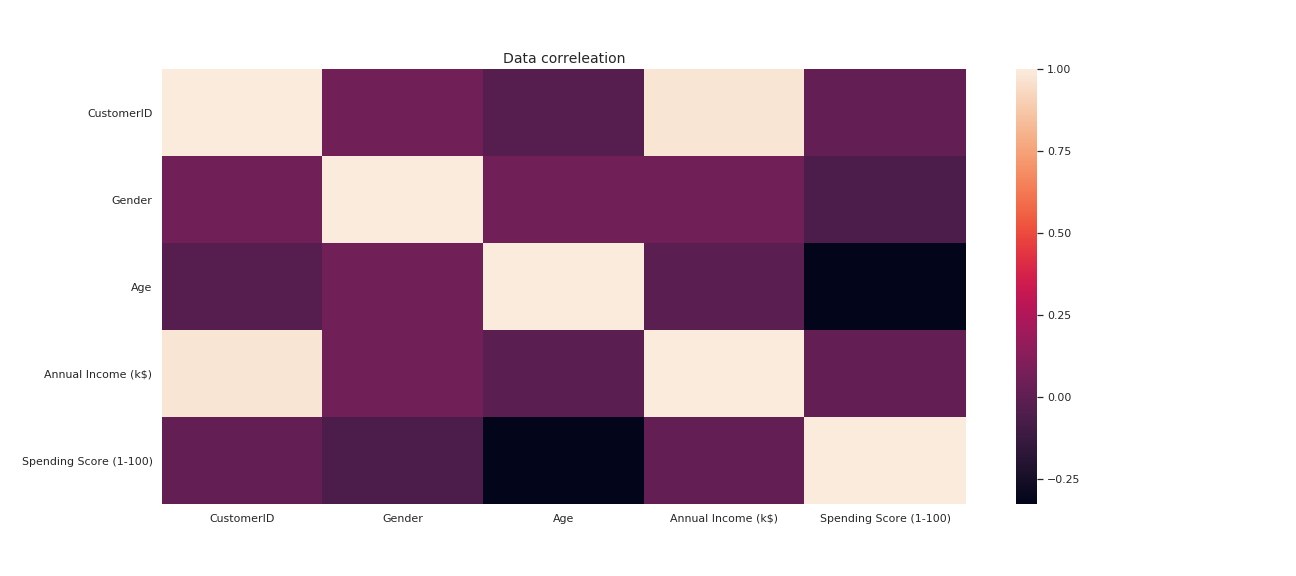

In [83]:
plt.rcParams['figure.figsize'] = (18, 8)
corr=data.corr()
sns.heatmap(corr)
plt.title("Data correleation", fontsize=14)
plt.plot()

The one with the least inference with each other can be analysized by seeing the color saturity. We see that Age is highly uncorreleated with the spending index. The maximum correleation is represnted by the bright skin colour and least with the black colour. We analyized from the heatmap, that the data is not well correleated


## <h1> Determing Relationship with the attributes </h2>

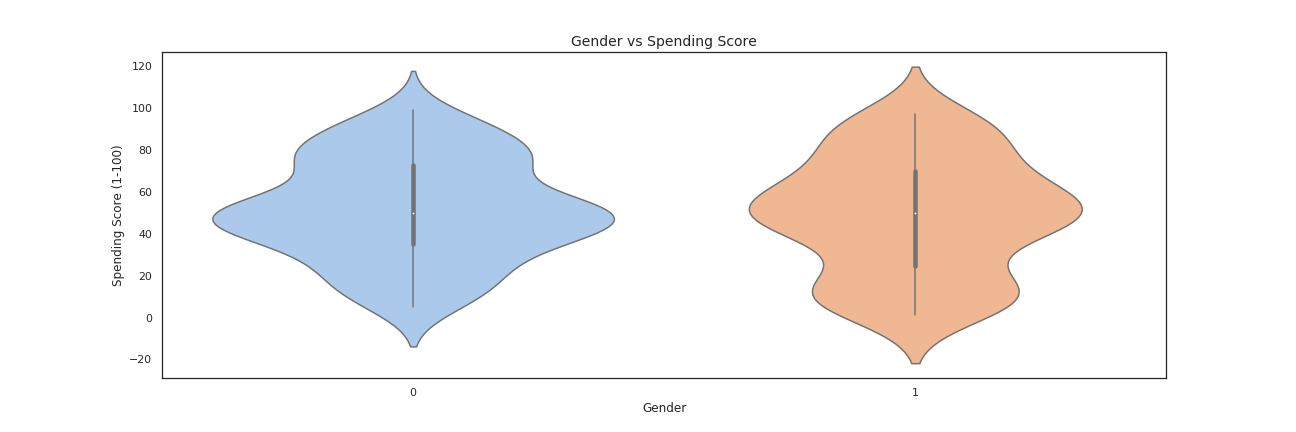

In [84]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(data['Gender'], data['Spending Score (1-100)'], palette = 'pastel')
plt.title('Gender vs Spending Score', fontsize = 14)
plt.show()

We conclude that spending score is more distributed in female

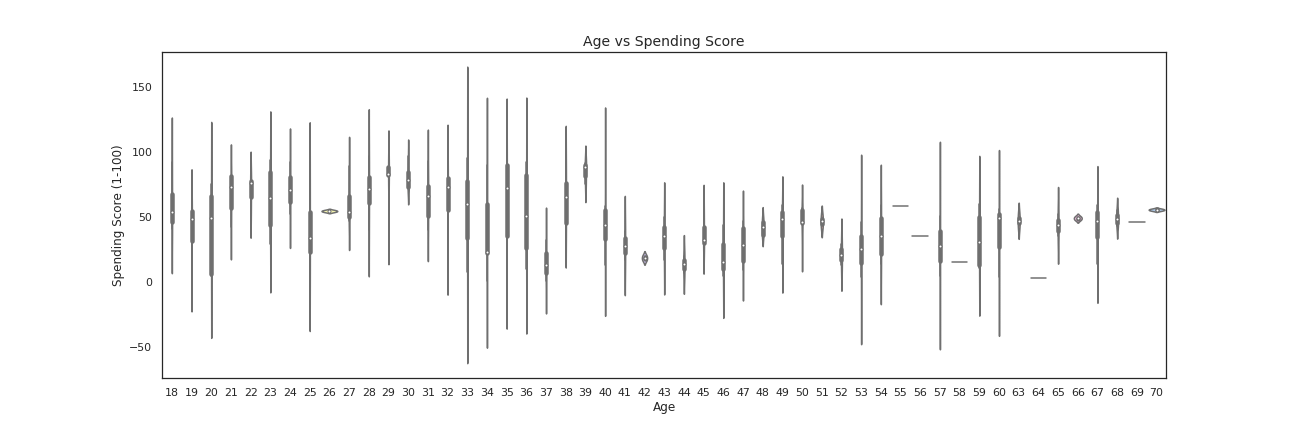

In [85]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(data['Age'], data['Spending Score (1-100)'], palette = 'pastel')
plt.title('Age vs Spending Score', fontsize = 14)
plt.show()

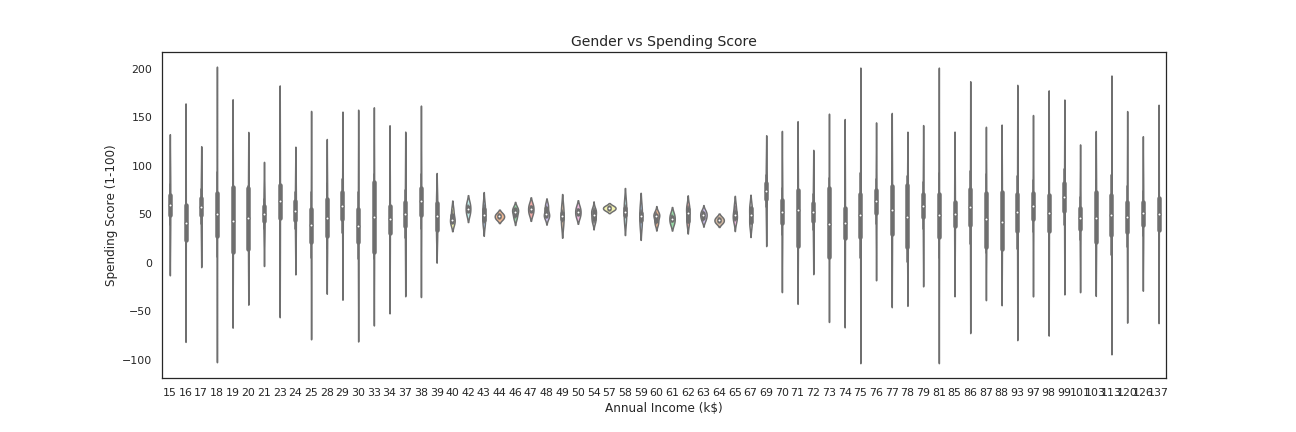

In [86]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], palette = 'pastel')
plt.title('Gender vs Spending Score', fontsize = 14)
plt.show()

Violin plot vs the Box plot
> a violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot shows the presence of different peaks, their position and relative amplitude.

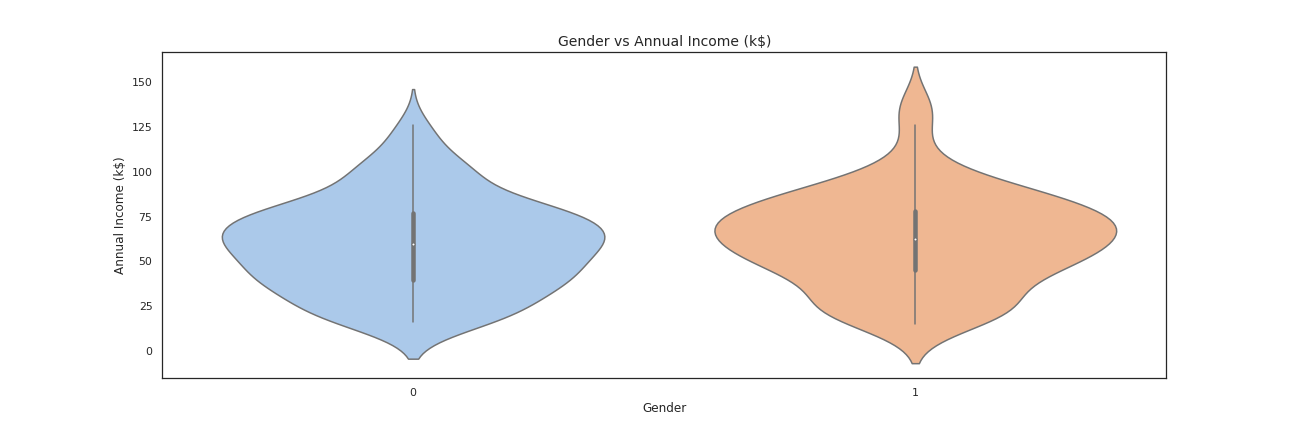

In [87]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'pastel')
plt.title('Gender vs Annual Income (k$)', fontsize = 14)
plt.show()

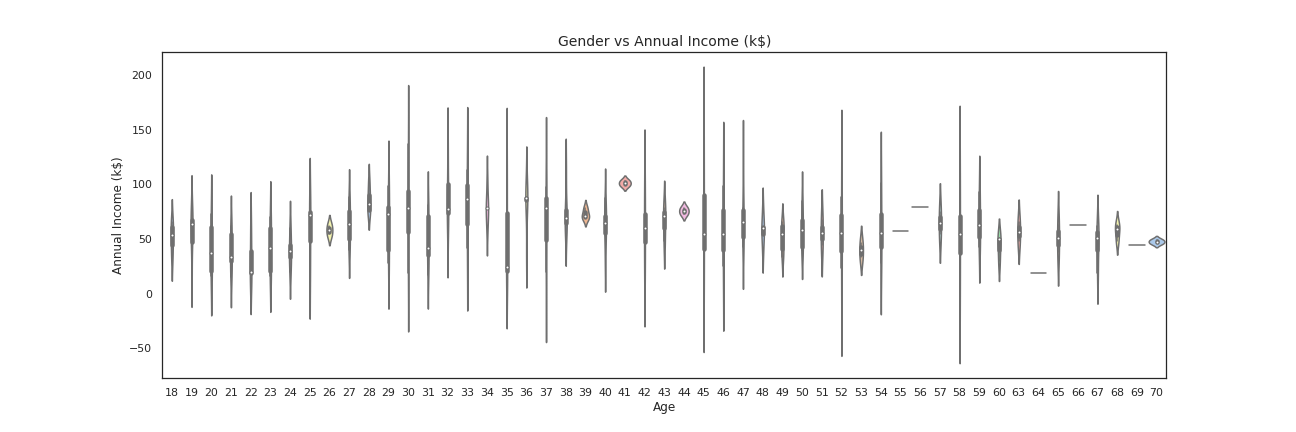

In [88]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(data['Age'], data['Annual Income (k$)'], palette = 'pastel')
plt.title('Gender vs Annual Income (k$)', fontsize = 14)
plt.show()

In [89]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, n_estimators=300)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
shap_values = shap.TreeExplainer(clf).shap_values(X)

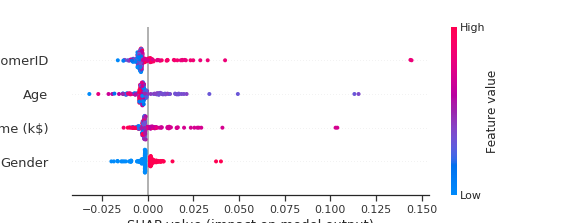

In [92]:
shap.summary_plot(shap_values[0], X)

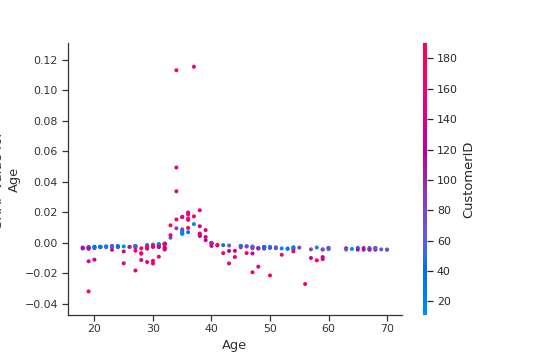

In [93]:
shap.dependence_plot("Age", shap_values[0], X)

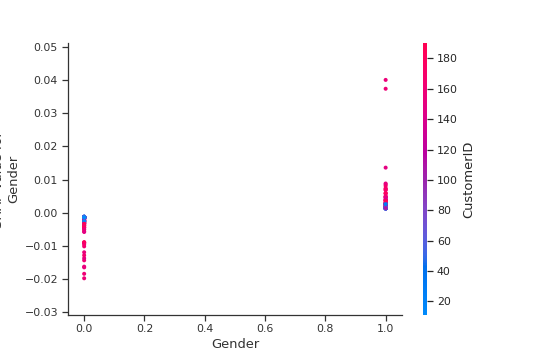

In [94]:
shap.dependence_plot("Gender", shap_values[0], X)

* 1 represents Male
* 0 represents Female

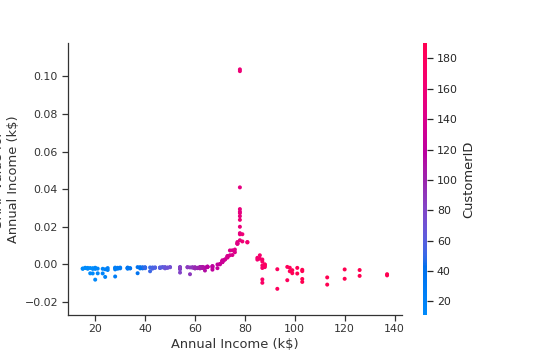

In [95]:
shap.dependence_plot('Annual Income (k$)', shap_values[0], X)
plt.show()

## <h1> CLUSTERING </h1>

K Means Clustering 
> k-means is one of the simplest unsupervised learning algorithms that solve the clustering problems. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). The main idea is to define k centers, one for each cluster.

> To start with k-means algorithm, you first have to randomly initialize points called the cluster centroids (K). K-means is an iterative algorithm and it does two steps: 1. Cluster assignment 2. Move centroid step.

> 1. Cluster assignment

> the algorithm goes through each of the data points and depending on which cluster is closer, It assigns the data points to one of the three cluster centroids.

> 2. Move centroid

> Here, K-means moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location.

> This process is repeated until there is no change in the clusters (or possibly until some other stopping condition is met). K is chosen randomly or by giving specific initial starting points by the user.

![K means clustering](https://cdn-images-1.medium.com/max/800/0*rrzG3LyOnAvOepbJ.png)

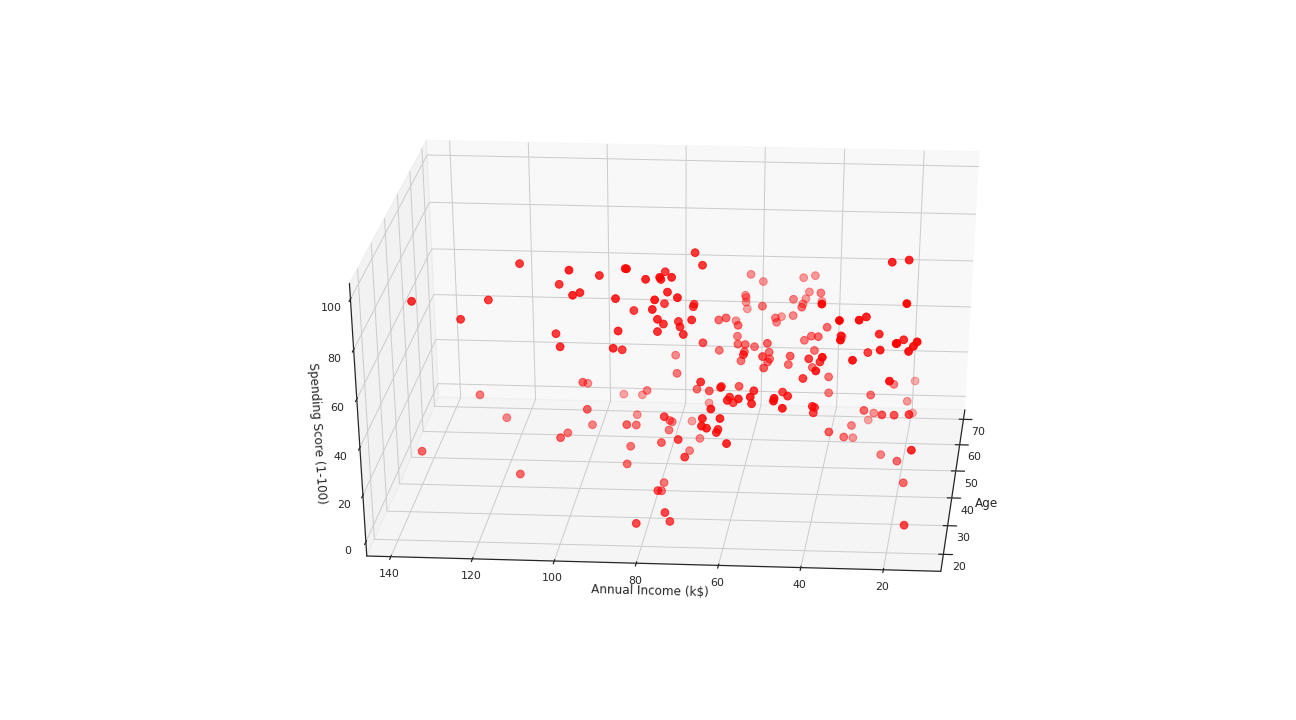

In [96]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data["Annual Income (k$)"], data["Spending Score (1-100)"], c='red', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

> Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids, called Within-Cluster-Sum-of-Squares (WCSS). This is computed as
![](https://content.edupristine.com/images/blogs/Beyond_the_k-Means_5.png)


> where Yi is centroid for observation Xi. By definition, this is geared towards maximizing number of clusters, and in limiting case each data point becomes its own cluster centroid. This is, naturally, neither practical nor desirable. Fig. 2 plots WCSS for k=1.20 and we can see that it continuously drops, indicating more clusters the better!

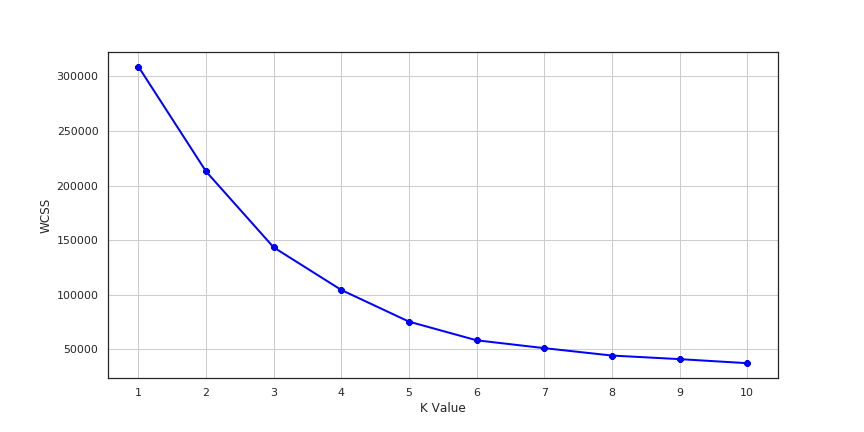

In [97]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

<b>K=5</b>

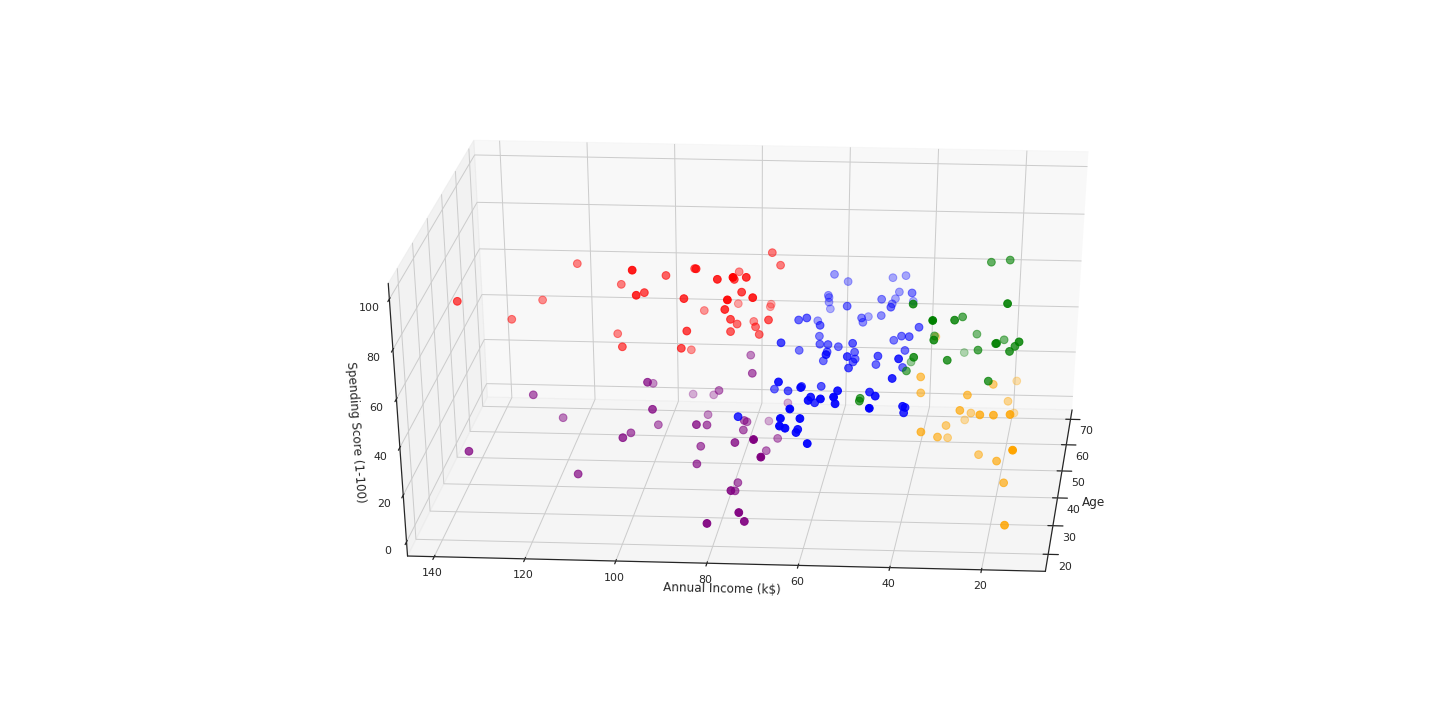

In [98]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## <h2>Hierarchical CLustering </h2>


> In hierarchical clustering, we assign each object (data point) to a separate cluster. Then compute the distance (similarity) between each of the clusters and join the two most similar clusters

In [99]:
data['Spending Score (1-100)']=data['Spending Score (1-100)'].astype(float)

Taking every attribute in account

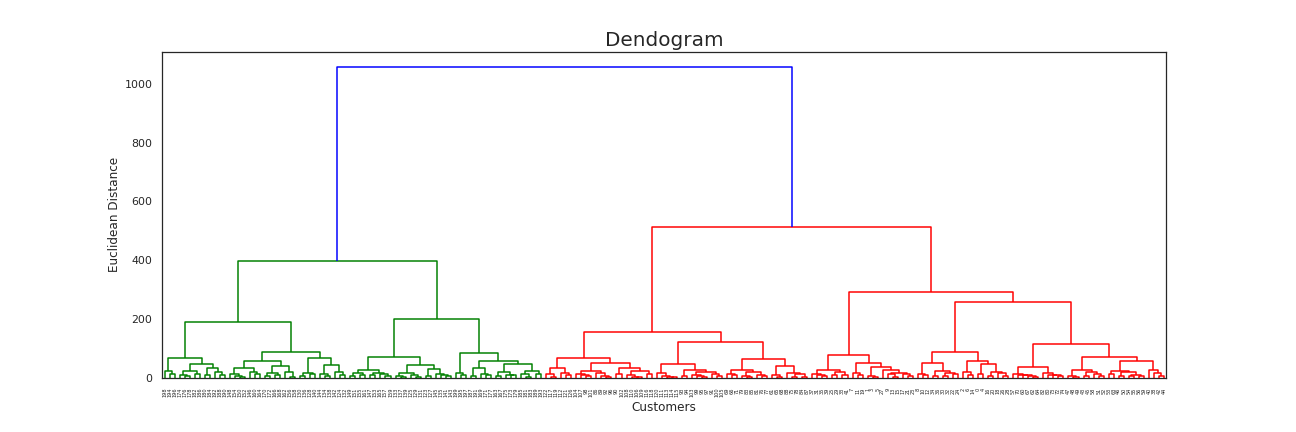

In [100]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendogram', fontsize=20)
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

When taking Annual Income and Spending Score in account

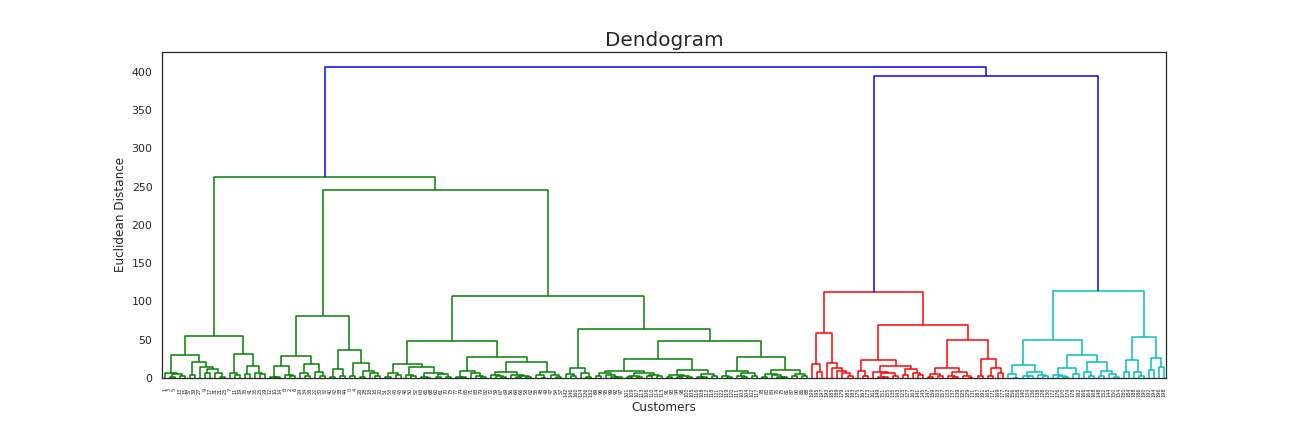

In [101]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(data.iloc[:,3:5],method='ward'))
plt.title('Dendogram', fontsize=20)
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [102]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39.0,3
1,2,1,21,15,81.0,2
2,3,0,20,16,6.0,3
3,4,0,23,16,77.0,2
4,5,0,31,17,40.0,3


Taking gender and Spending Score in account

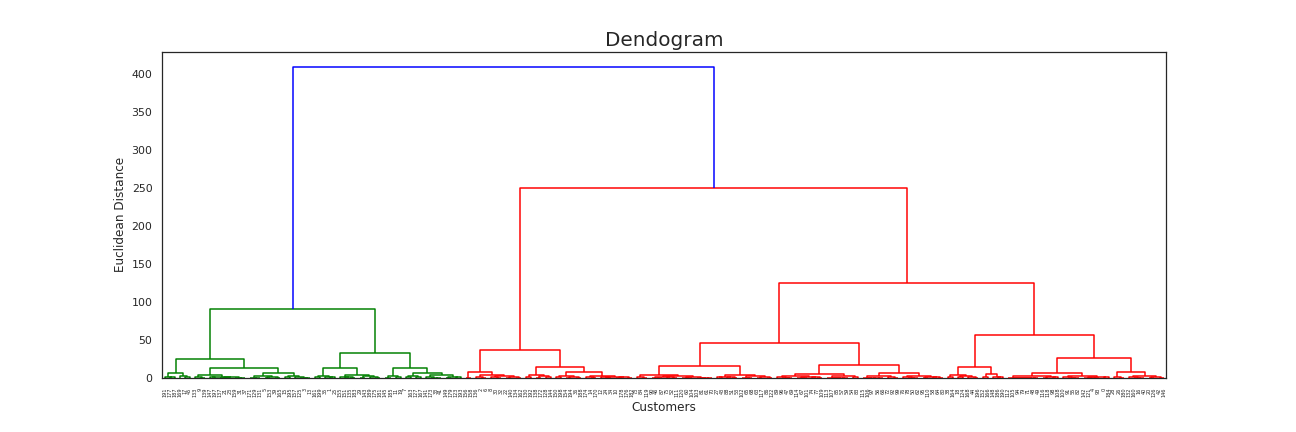

In [103]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(data.iloc[:,[1,4]],method='ward'))
plt.title('Dendogram', fontsize=20)
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

Taking age and spending score in account

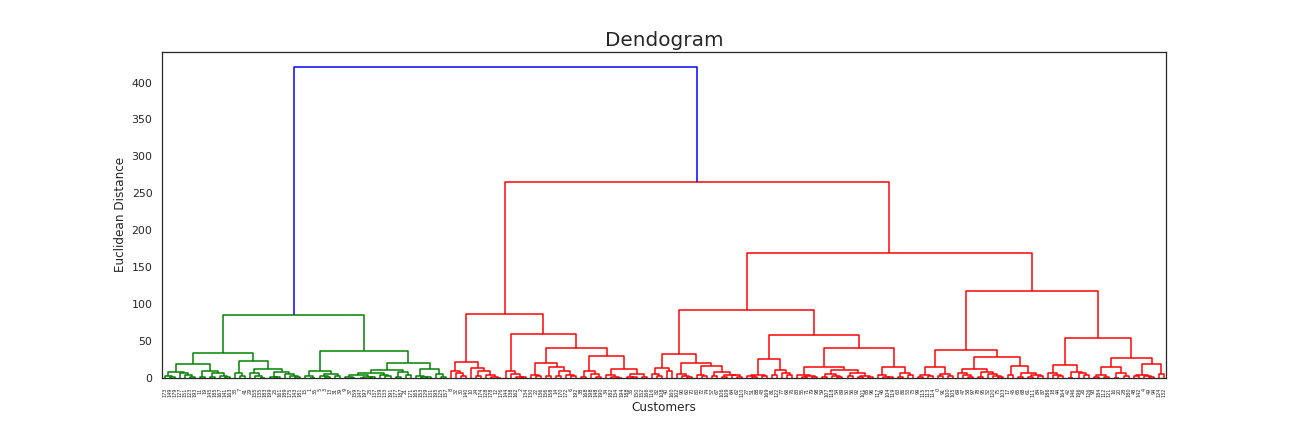

In [104]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(data.iloc[:,[2,4]],method='ward'))
plt.title('Dendogram', fontsize=20)
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

<h1 align="center"> End Of Kernel </h1>